In [46]:
#!/usr/bin/env python
"""
Demo for CGLS test problem on a small scale problem Deblurring problem how to stack A and L and call CGLS
--------------------------------------------------------------------------
Created in 2024 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha, Silvia Gazzola, Connor Sanderford, and Ugochukwu Obinna Ugwu"
__affiliations__ = 'Tufts University, University of Bath, Arizona State University, and Tufts University'
__copyright__ = "Copyright 2023, TRIPs-Py library"
__license__ = "GPL"
__version__ = "1.0"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com; sg968@bath.ac.uk; csanderf@asu.edu; connorsanderford@gmail.com; Ugochukwu.Ugwu@tufts.edu"

In [10]:
from trips.solvers.tSVD import *
from trips.test_problems.Deblurring import Deblurring
import matplotlib.pyplot as plt
from trips.utilities.helpers import *
from trips.utilities.operators import *
from trips.solvers.CGLS import *

In [11]:
# Deblurring example test problem
Deblur = Deblurring(CommitCrime = False)
# In the class Deblurring we have can define the type of problem to be used.
generate_matrix = True #Defines a blurring operator where the forward operator matrix is formed explicitly
nx = 50 # Define the first dimension of the image
ny = 50 # Define the second dimension of the image
spread = (1,1) # The PSF parameter
choose_image = 'satellite' #The choice of the image:
# Options for the choice of the image are Himage, satellite64, satellite128, edges
# if generate_matrix == True:
shape = (nx, ny)
dim = (3,3)
A = Deblur.forward_Op(dim, spread, nx, ny)
x_true = Deblur.gen_true(choose_image)
b_true = Deblur.gen_data(x_true)
(b, delta) = Deblur.add_noise(b_true, opt = 'Gaussian', noise_level = 0.01)
b_vec = b.reshape((-1,1))

data already in the path.


In [20]:
# pick an initial guess
x_0 = A.T@b_vec

In [34]:
L = first_derivative_operator_2d(nx, ny)
## Only for relatively small scale problems
# A = A.todense()
L = L.todense()

In [43]:
# Ahat = np.concatenate((A, L))
reg_param = 0.01
Ahat = np.vstack((A,np.sqrt(reg_param)*L))

In [44]:
bhat = np.concatenate((b_vec, np.zeros((L.shape[0], 1) )))

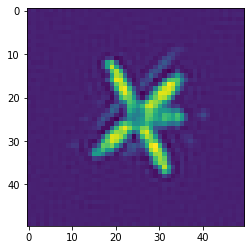

In [45]:
x_cgls, info = CGLS(Ahat, bhat, x_0, max_iter = 50, tol = 0.001)
plt.imshow(x_cgls.reshape((nx, ny)))